# 1. Look at the Big picture

## Frame the problem
* Supervised Learning : label
* Classification task : To classify if the job Posting is fake or real
* Batch Learning : No continuous flow of data, no. hanging data rapidly, and small enough to fit in memory

---------------------------------------------------
# 2. Get the Data

* Load the data using pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'hhzet11'
os.environ['KAGGLE_KEY'] = "2698b4a5f39bb4b8c96d4af086aeb254"

In [3]:
!kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction
!unzip '*.zip'
!ls

 68% 11.0M/16.1M [00:00<00:00, 76.6MB/s]
100% 16.1M/16.1M [00:00<00:00, 57.9MB/s]
Archive:  real-or-fake-fake-jobposting-prediction.zip
  inflating: fake_job_postings.csv   
fake_job_postings.csv  real-or-fake-fake-jobposting-prediction.zip  sample_data


In [126]:
df = pd.read_csv('fake_job_postings.csv')

* Take a quick look at the data structure

In [5]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.shape

(17880, 18)

# 3. Discover and Visualize the data to gain insights

* Feature Selection

In [9]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [127]:
del df['salary_range']
del df['job_id']

* Check for missing values

In [128]:
print(df['department'].value_counts())
df['department'] = df['department'].fillna(value = 'other')

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64


In [129]:
print(df['required_education'].value_counts())
df['required_education'] = df['required_education'].fillna(value = 'other')

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64


In [130]:
#Check for number of null values
df.isnull().sum()

title                     0
location                346
department                0
company_profile        3308
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education        0
industry               4903
function               6455
fraudulent                0
dtype: int64

In [131]:
#df = df.replace(np.nan, 'other', regex = True)
df.dropna(axis = 0, how = 'any', inplace = True)
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [132]:
df.shape

(5232, 16)

* Balancing dataset

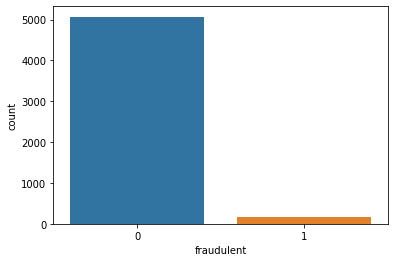

In [133]:
sns.countplot(x = "fraudulent", data = df)

In [134]:
fraud = df[df['fraudulent'] == 1]
print(fraud.shape)
not_fraud = df[df['fraudulent'] == 0]
print(not_fraud.shape)

(163, 16)
(5069, 16)


In [135]:
fraud = fraud.sample(5069, replace = True)
fraud.shape, not_fraud.shape

((5069, 16), (5069, 16))

In [136]:
df = fraud.append(not_fraud)
df = df.reset_index()
df.shape

(10138, 17)

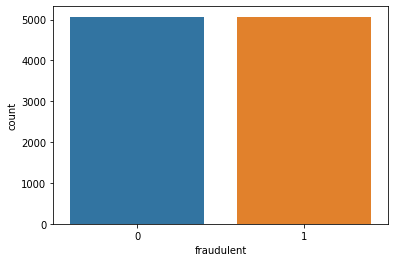

In [137]:
sns.countplot(x = "fraudulent", data = df)

* Categorical value

In [138]:
df['location'].value_counts()

US, CA, Bakersfield        634
US, CA, San Jose           411
US, TX, AUSTIN             390
US, NY, New York           331
GB, LND, London            323
                          ... 
US, CT, Westport             1
BG, 23,                      1
US, SC, Rock Hill            1
US, ID, Moscow               1
US, IA, West Des Moines      1
Name: location, Length: 1118, dtype: int64

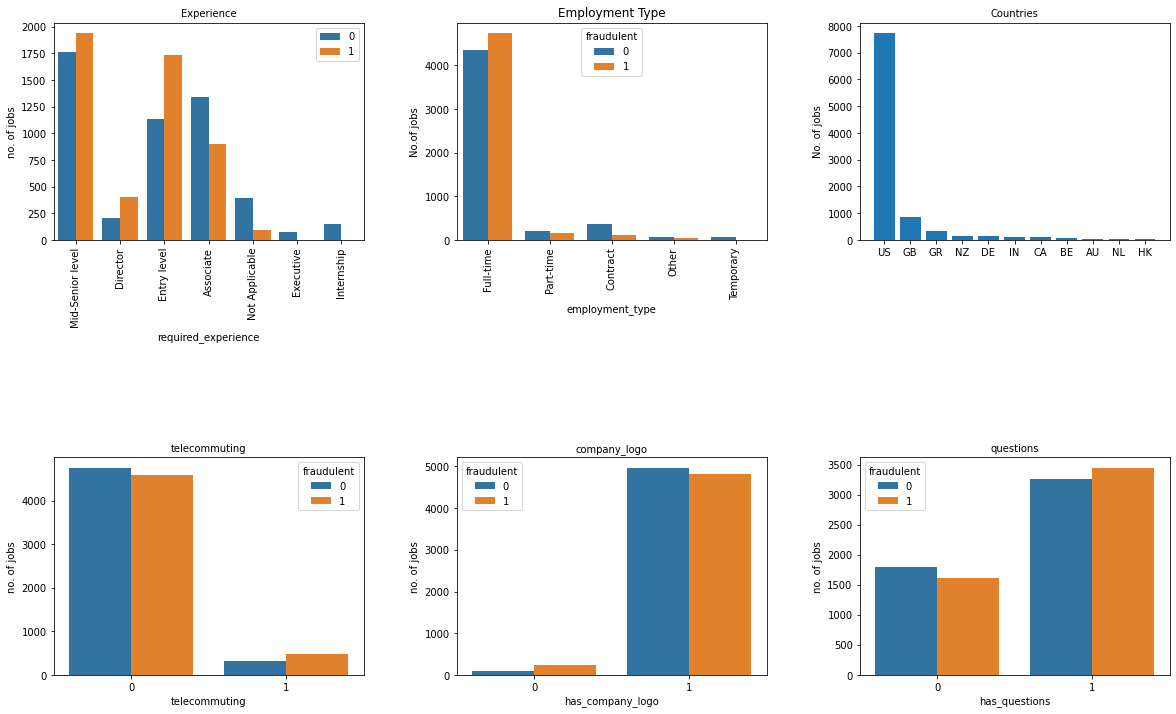

In [139]:
# experience 
plt.figure(figsize = (20, 12))
plt.subplot(2, 3, 1)
sns.countplot(hue = df.fraudulent, x = df.required_experience)
plt.title('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')

# employment type
plt.subplot(2, 3, 2)
sns.countplot(hue = df.fraudulent, x = df.employment_type)
plt.title('Employment Type')
plt.ylabel('No.of jobs')
plt.xticks(rotation = 90)

# country
plt.subplot(2, 3, 3)
def split(location):
    l = location.split(',')
    return l[0]

df['country'] = df.location.apply(split)
df.drop(['location'], axis = 1, inplace = True)
country = dict(df.country.value_counts()[:11])
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.title('Countries', size=10)

# telecommuting
plt.subplot(2, 3, 4)
sns.countplot(hue = df.fraudulent, x = df.telecommuting)
plt.title('telecommuting', size=10)
plt.ylabel('no. of jobs', size=10)

# company_logo
plt.subplot(2, 3, 5)
sns.countplot(hue = df.fraudulent, x = df.has_company_logo)
plt.title('company_logo', size=10)
plt.ylabel('no. of jobs', size=10)

# questions
plt.subplot(2, 3, 6)
sns.countplot(hue = df.fraudulent, x = df.has_questions)
plt.title('questions', size=10)
plt.ylabel('no. of jobs', size=10)

plt.subplots_adjust(hspace = 1.0, wspace = 0.3)
plt.show()

* Make categorical variable to numerical data

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
df['text'] = df[['title', 'department','company_profile',
                 'description','requirements','benefits']
                ].apply(lambda x: ' '.join(x), axis = 1) 

In [142]:
df.drop(['title', 'department','company_profile','description',
         'requirements','benefits'], axis=1, inplace=True)

In [144]:
label_columns = ['employment_type','required_experience', 'country',
                 'required_education', 'industry', 'function']
le = LabelEncoder()
for i in label_columns :
  df[i] = le.fit_transform(df[i])

In [145]:
df_columns = df.columns.values

In [146]:
df_columns = df_columns[-1:] + df_columns[:-1]
df.drop(['index'], axis = 1, inplace = True)

* Looking for Correlations

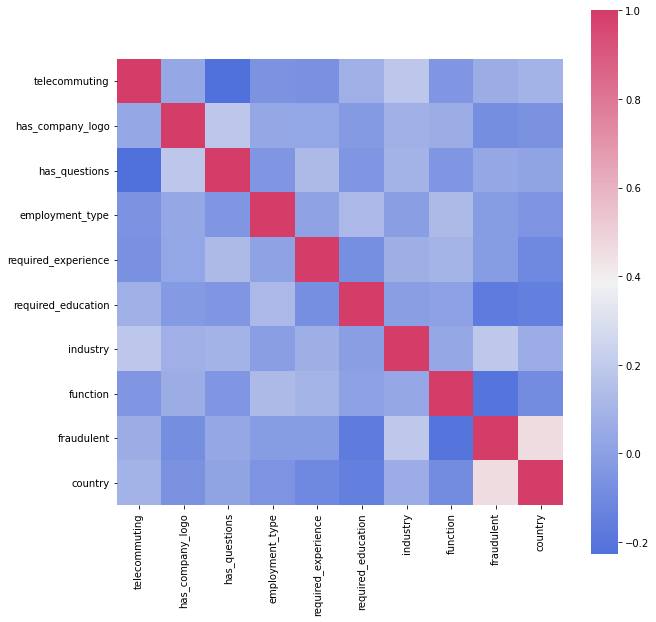

In [147]:
plt.figure(figsize = (10, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, mask = np.zeros_like(corr_matrix, dtype = np.bool), 
            cmap = sns.diverging_palette(-100, 0, as_cmap = True), square = True)

In [148]:
corr_matrix["fraudulent"].sort_values(ascending = False)

fraudulent             1.000000
country                0.461406
industry               0.187261
telecommuting          0.064467
has_questions          0.038376
required_experience   -0.017648
employment_type       -0.018467
has_company_logo      -0.079961
required_education    -0.173853
function              -0.203570
Name: fraudulent, dtype: float64

# 4. Prepare the Data for Machine Learning Algorithms

* Combine text in a single column to clean data

In [149]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")

In [151]:
df.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country', 'text'],
      dtype='object')

In [152]:
def clean_text(text, ):
        if text is not None:

                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)

        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)

        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)

        # strip html 
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)

        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)

        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text) # stemming
        text = remove_stopwords(text) # remove stopwords

        return text

In [153]:
df['text'] = df['text'].apply(clean_text)
df['text'].head()

0    research engin data scienc engin aptitud staf ...
1    director technic oper engin urlddbfaeecfaccfbf...
2    custom servic repres call center industri larg...
3    cleric personnel bradley contract group corpor...
4    senior engin product manag engin aptitud staf ...
Name: text, dtype: object

In [154]:
vectorizer = TfidfVectorizer(max_features = 2000)
text = vectorizer.fit_transform(df['text'])
df1 = pd.DataFrame(text.toarray(), columns = vectorizer.get_feature_names())
df.drop(["text"], axis = 1, inplace = True)
main_df = pd.concat([df1, df], axis = 1)

In [155]:
main_df.head()

,ab,abil,abl,abov,abroad,accept,access,accessbas,accion,accommod,...,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0.0,0.000000,0.038425,0.0,0.0,0.0,0.046222,0.0,0.0,0.0,...,0,1,1,1,5,5,67,12,1,62
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,1,1,1,5,67,12,1,62
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,1,1,2,4,101,7,1,62
3,0.0,0.030456,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,1,1,1,2,4,48,17,1,62
4,0.0,0.016485,0.000000,0.0,0.0,0.0,0.023692,0.0,0.0,0.0,...,0,1,1,1,5,1,19,12,1,62


* Split dataset into training and testing

In [156]:
from sklearn.model_selection import train_test_split

In [178]:
#Y = main_df['fraudulent'].values
#main_df.drop(['fraudulent'], axis = 1, inplace = True)
#X = main_df.values
#Y = Y.values
df.drop(['fraudulent'], axis = 1, inplace = True)
X = df.values

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8110, 9), (2028, 9), (8110,), (2028,))

# 5. Select and Train a Model

* Train & Test the model : Logistic Regression



In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [198]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

In [181]:
pred = model_lr.predict(X_test)
print('Accuracy : ', accuracy_score(pred, Y_test))
print(classification_report(Y_test, pred))

Accuracy :  0.7628205128205128
              precision    recall  f1-score   support

           0       0.84      0.65      0.73      1011
           1       0.72      0.87      0.79      1017

    accuracy                           0.76      2028
   macro avg       0.78      0.76      0.76      2028
weighted avg       0.78      0.76      0.76      2028



* Train & Test the model : DecisionTreeClassifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [190]:
pred = tree.predict(X_test)
print(accuracy_score(pred, Y_test))
#print(classification_report(pred, Y_test))

0.9896449704142012


* Train & Test the model : K Nearest Neighbors

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [185]:
pred = knn.predict(X_test)
print(accuracy_score(pred, Y_test))

0.9827416173570019


* Better Evaluation using cross-validation

In [168]:
from sklearn.model_selection import cross_val_score

In [186]:
score = cross_val_score(model_lr, X_train, Y_train, scoring = 'accuracy', cv = 10)
print("Scores : ", score)
print("Mean : ", score.mean())
print("Standard Variation : ", score.std())

Scores :  [0.76695438 0.77311961 0.74229346 0.7755857  0.77435265 0.73612824
 0.7755857  0.76078915 0.75092478 0.75709001]
Mean :  0.7612823674475957
Standard Variation :  0.013677360911331232


In [187]:
score = cross_val_score(knn, X_train, Y_train, scoring = 'accuracy', cv = 10)
print("Scores : ", score)
print("Mean : ", score.mean())
print("Standard Variation : ", score.std())

Scores :  [0.97657213 0.98273736 0.96794081 0.97780518 0.97163995 0.96547472
 0.98520345 0.97410604 0.97533909 0.97533909]
Mean :  0.9752157829839703
Standard Variation :  0.005716067564241315


In [188]:
score = cross_val_score(tree, X_train, Y_train, scoring = 'accuracy', cv = 10)
print("Scores : ", score)
print("Mean : ", score.mean())
print("Standard Variation : ", score.std())

Scores :  [0.99013564 0.98890259 0.9864365  0.98890259 0.99136868 0.98890259
 0.98890259 0.98766954 0.9864365  0.98890259]
Mean :  0.9886559802712702
Standard Variation :  0.0014379659420087228


* Train & Test model : Random Forest Algorithm

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
model_rf = RandomForestClassifier(n_estimators = 5)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5)

In [192]:
pred = model_rf.predict(X_test)
print(accuracy_score(pred, Y_test))

0.9911242603550295


# 6. Fine-Tune Model

In [193]:
from sklearn.model_selection import GridSearchCV

In [195]:
param_grid = {'n_estimators': [3, 5, 7, 10], 'max_features':[2, 4, 6]}
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, 
                           scoring='accuracy')
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [196]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01747911, 0.012913  , 0.03618978, 0.04424964, 0.08130958,
       0.20438261, 0.24801797, 0.16674966, 0.18870864])

# 7. Evaluate your system on the test set

In [202]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(final_predictions, Y_test)
final_accuracy

0.98310200224816


# 8. Launch, Monitor, Maintain